In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import   train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.cluster import KMeans

In [3]:
df=pd.read_excel('D:\Google Drive\imarticus python\Arul Sir\K-means\Dataset\cust_data.xlsx')

In [4]:
df.sample(5)

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
24097,24098,F,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8522,8523,F,4,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
4156,4157,F,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29631,29632,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6042,6043,F,0,1,0,0,3,0,0,0,...,0,0,2,0,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

### FILLING NULL VALUES IN GENDER

In [6]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  30000 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [8]:
df.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Jordan', ylabel='count'>

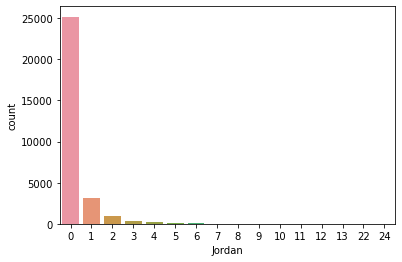

In [9]:
sns.countplot(df['Jordan'])

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gatorade', ylabel='count'>

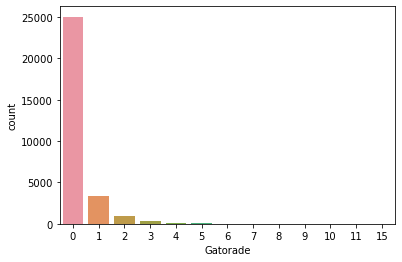

In [10]:

sns.countplot(df['Gatorade'])

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Samsung', ylabel='count'>

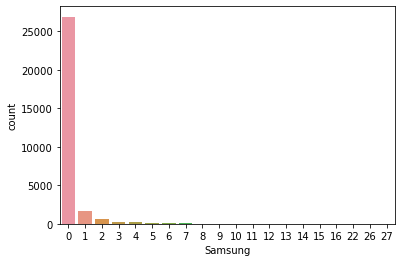

In [11]:
sns.countplot(df['Samsung'])

## ENCODING for the GENDER variable

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['Gender'].value_counts()

0    24778
1     5222
Name: Gender, dtype: int64

In [14]:
df.drop(['Cust_ID'],axis=1,inplace=True)

In [15]:
pd.set_option('display.max_columns', None)

In [16]:
df

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,7,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
2,1,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29996,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29997,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29998,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## K MEANS ALGORITHM

In [17]:
# finding the k values
wcss=[]
for i in range(1,21):
    km=KMeans(n_clusters=i)
    km.fit(df)
    wcss.append(km.inertia_)

In [18]:
wcss

[922806.4653666655,
 620898.7650530629,
 572554.5446585158,
 547374.6467648449,
 527578.570236328,
 511498.0863013499,
 496971.7164552973,
 484498.0706095386,
 478982.66025120916,
 466391.36532965885,
 461605.06592424866,
 449573.4326474048,
 445190.28413710115,
 435823.7569590473,
 433051.8463466462,
 424584.17023818474,
 420258.80353311176,
 414669.34304648754,
 407810.58347405447,
 407327.99310575315]

Text(0.5, 1.0, 'WCSS accross multiple clusters')

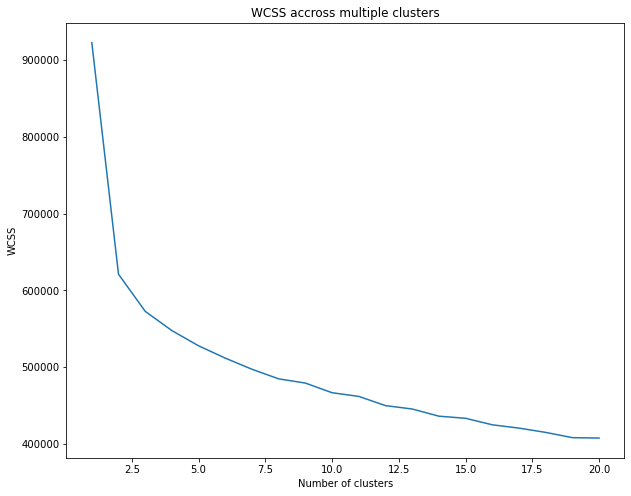

In [19]:
plt.figure(figsize=(10,8))
plt.plot(range(1,21),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('WCSS accross multiple clusters')

## WE FOUND THE K VALUE = 7

## K MEANS WITH 7 CLUSTERS

In [20]:
Kmeans=KMeans(n_clusters=7)
Kmeans.fit(df)

KMeans(n_clusters=7)

In [21]:
df['clusters']=Kmeans.labels_

In [22]:
df.head()

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,clusters
0,1,7,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0,4
2,1,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,6
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1,1


<AxesSubplot:>

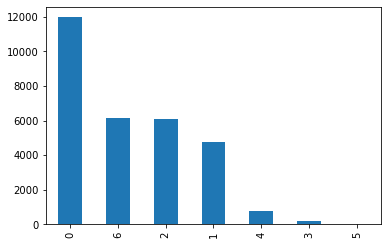

In [23]:
df['clusters'].value_counts().plot(kind='bar')

In [24]:
from sklearn.metrics import silhouette_score

In [25]:
print(silhouette_score(df.iloc[:,0:-1],labels=df['clusters']))

0.14924445098798306


In [26]:
df.groupby(['clusters'])['Orders'].count()

clusters
0    11971
1     4771
2     6087
3      223
4      804
5        1
6     6143
Name: Orders, dtype: int64

In [27]:
pd.crosstab(df['clusters'],df['Gender'])

Gender,0,1
clusters,,
0,9954,2017
1,3905,866
2,4971,1116
3,177,46
4,740,64
5,1,0
6,5030,1113
